# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for original data</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

Our code uses multiple libraries, so if you encounter an error, you probably lack one of them.
In that case, uncomment and run the next cell.

In [3]:
#!pip install --user -r requirements.txt

In [1]:
import numpy as np
import random
import re

In [2]:
model_dir = "sample_code_submission/"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

<div>
<img src="CNN.png" width=800 align="center" border="20">
We used a special Convolutional Neural Network (CNN) already trained to recognize images in order to create the new data. To create it, we just kept the last form of the data, just before classification. <br>
This new form is highly similar to weights we can see in a classic neural network.
</div>

In [4]:
data_dir = 'sample_data'
data_name = 'Areal'

In [5]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 300
Number of features = 4096
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10    sea_ice
11   snowberg
12    wetland
Number of classes = 13


In [6]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096,target
0,0.0,0.0,0.0,0.000000,0.086625,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,2.014147,0.0,0.955390,0.0,0.0,0.000000,forest
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.312153,0.0,0.000000,0.0,2.953564,0.0,0.0,1.072329,chaparral
2,0.0,0.0,0.0,2.515129,0.095439,0.0,0.045738,0.148969,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,chaparral
3,0.0,0.0,0.0,0.000000,1.188573,0.0,0.000000,0.000000,0.0,0.0,...,2.228957,1.464646,0.0,0.000000,0.0,1.624980,0.0,0.0,0.000000,beach
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,2.063259,0.0,0.000000,0.0,1.344442,0.0,0.0,0.552447,river


In [7]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_4087,feature_4088,feature_4089,feature_4090,feature_4091,feature_4092,feature_4093,feature_4094,feature_4095,feature_4096
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000
mean,0.006075,0.000996,0.035626,0.198109,0.306302,0.145392,0.029904,0.015574,0.017993,0.288413,...,0.004769,0.609520,0.597160,0.323590,0.020528,0.031902,1.481293,0.0,0.004534,1.239524
std,0.105224,0.014681,0.236130,0.668374,0.436969,0.522102,0.198194,0.179693,0.155665,0.591321,...,0.082608,1.323339,0.917379,1.019010,0.174347,0.250427,1.776533,0.0,0.078524,1.317253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.063618,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.872153,0.0,0.000000,0.898127
75%,0.000000,0.000000,0.000000,0.000000,0.523254,0.000000,0.000000,0.000000,0.000000,0.366293,...,0.000000,0.559731,0.934315,0.000000,0.000000,0.000000,2.437103,0.0,0.000000,2.187367
max,1.822537,0.249662,2.510623,4.527941,2.389151,3.870526,1.803066,2.875917,2.048211,4.265208,...,1.430818,9.752917,4.911635,7.399162,2.014147,3.326735,9.211884,0.0,1.360076,5.854851


In [8]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

        target
0       forest
1    chaparral
2    chaparral
3        beach
4        river
5        beach
6    chaparral
7        cloud
8       forest
9    chaparral
10      island
11     sea_ice
12      meadow
13       river
14      forest
15      desert
16       cloud
17       river
18      island
19      meadow
20       river
21       beach
22       beach
23       beach
24    mountain
25       river
26     wetland
27       cloud
28       cloud
29        lake
..         ...
270    wetland
271  chaparral
272     meadow
273   mountain
274    wetland
275   mountain
276    sea_ice
277  chaparral
278   snowberg
279    sea_ice
280      cloud
281    wetland
282   mountain
283     desert
284      river
285     island
286    sea_ice
287      cloud
288     forest
289   snowberg
290   mountain
291      river
292    sea_ice
293      cloud
294   snowberg
295      cloud
296      cloud
297     island
298       lake
299     forest

[300 rows x 1 columns]


### Visualization of values

Most values are in the range (0, 5), with many really close to 0, and more than half are zero.

In [35]:
number_0 = (data.iloc[:,:-1] == 0).sum().sum()
total_number = (data.iloc[:,:-1] == 0).sum().sum() + (data.iloc[:,:-1] != 0).sum().sum()
print("Proportion of zeros : {:.2%}".format(number_0 / total_number))
print("Proportion of values inferior to 5 : {:.2%}".format((data.iloc[:,:-1] < 5).sum().sum() / total_number))

Proportion of zeros : 86.19%
Proportion of values inferior to 5 : 99.26%


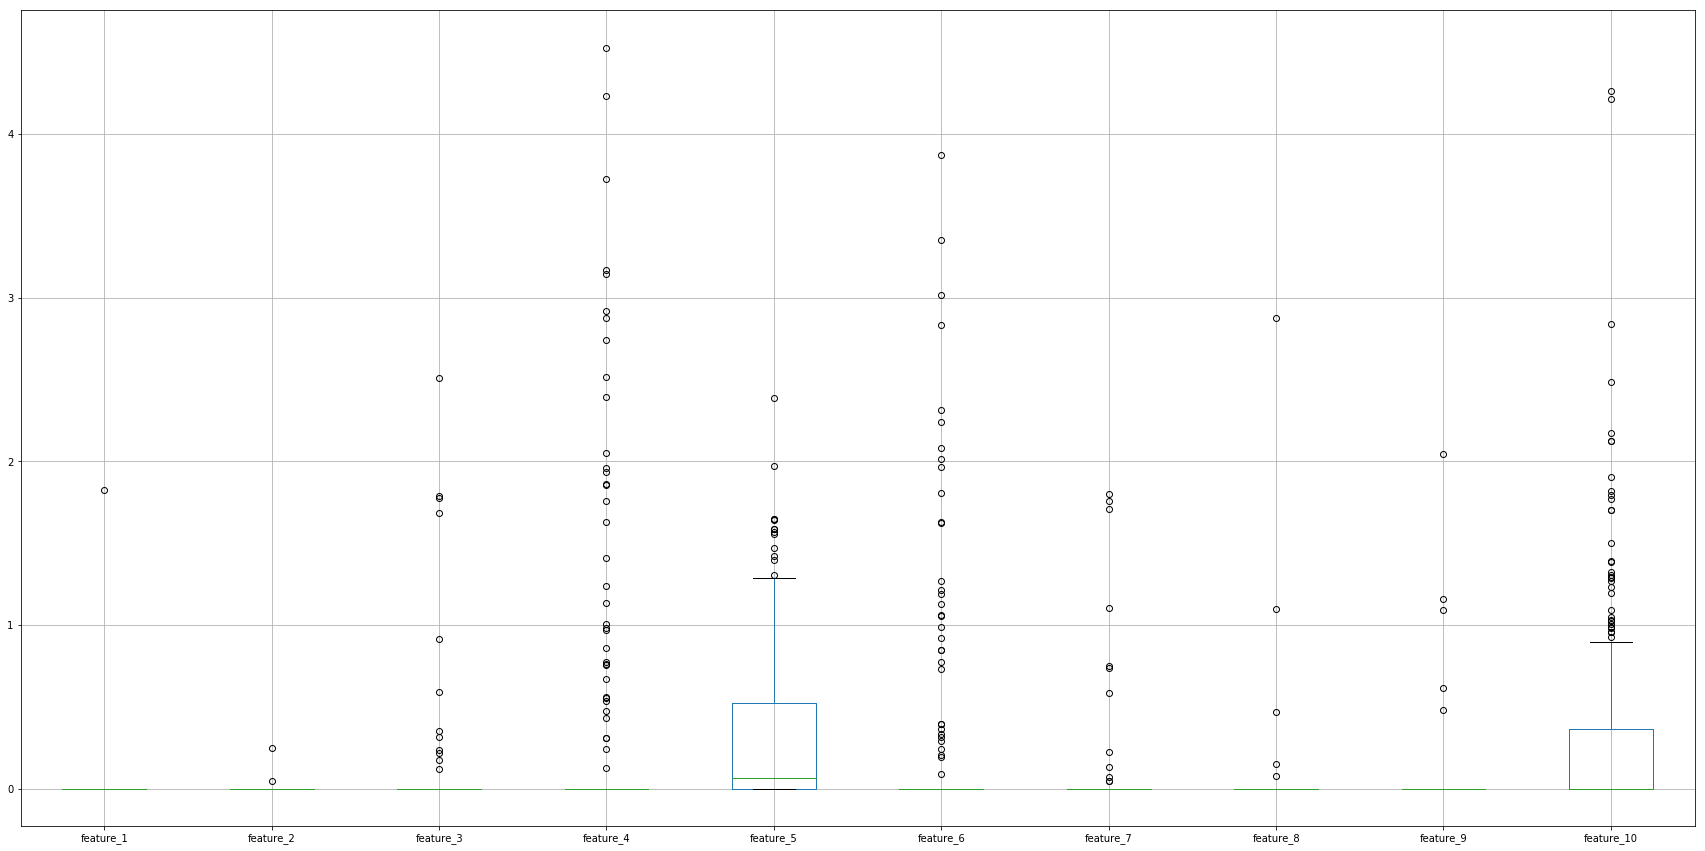

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
# Plot values of first 10 features
data_plot=data.iloc[:,:10]
data_plot.boxplot()
plt.show()

### Visualisation as images

Although any human won't be able to make sense of those images, it is by far simpler and faster for computers to correctly recognize those "images" and assign them their correct classes.

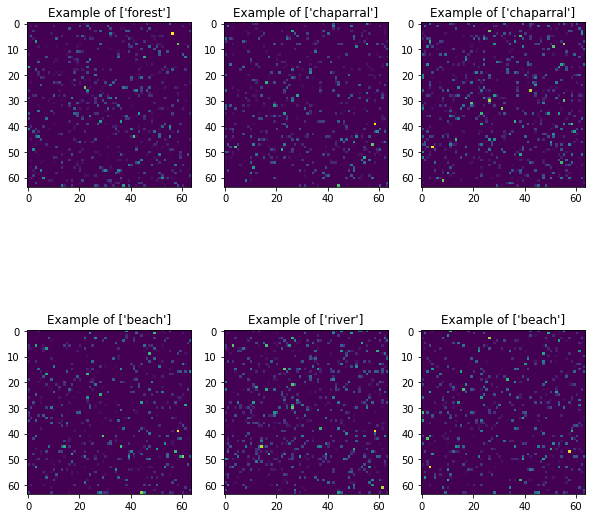

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.values[i][:-1].reshape(64, 64)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float))

plt.show()

# Step 2: Building a predictive model

Use DataManager to separate data for train, validation and test

In [9]:
from data_manager import DataManager
D = DataManager(data_name, data_dir)
print(D)

Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal preprocessed data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 4096
	target_num = 13
	label_num = 13
	train_num = 300
	valid_num = 100
	test_num = 0
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(300, 4096)
	Y_train = array(300, 1)
	X_valid = array(100, 4096)
	Y_valid = array(100, 1)
	X_test = array(100, 4096)
	Y_test = array(100, 1)
feat_type:	array(4096,)
feat_idx:	array(0,)



Get data and labels by calling D.data (DataManager.data)

In [10]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [11]:
from model import SimpleDecisionTree

In [12]:
M = SimpleDecisionTree()

#### Fit the model

Data as first argument, Labels as second, with .reshape(-1) to make sure that the array containing labels is flat and don't have multiple dimensions.

In [13]:
M.fit(X_train, Y_train.reshape(-1))

FIT: dim(X)= [300, 4096]
FIT: dim(y)= [300, 1]


In [14]:
Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

PREDICT: dim(X)= [300, 4096]
PREDICT: dim(y)= [300, 1]
PREDICT: dim(X)= [100, 4096]
PREDICT: dim(y)= [100, 1]
PREDICT: dim(X)= [100, 4096]
PREDICT: dim(y)= [100, 1]


In [15]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
from data_io import mkdir
mkdir(result_dir)

write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring predictions

In [16]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [17]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train), "\n")

print("Scores with BaselineModel")
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000 

Scores with BaselineModel
Training score for the accuracy metric = 1.0000
Validation score for the accuracy metric = 0.3300
Test score for the accuracy metric = 0.2900


## Confusion matrix

Doesn't have much value on train with a 100% accuracy, so it is for validation

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(D.data['Y_valid'], Y_hat_valid)

array([[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 2, 7, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 6, 0, 3, 2, 1, 2],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0],
       [0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 3]])

# Cross-validation

Because validation and test labels should first not be available, we do cross validation to see our models quality

In [19]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SimpleDecisionTree(), X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [240, 4096]
FIT: dim(y)= [240, 1]
PREDICT: dim(X)= [60, 4096]
PREDICT: dim(y)= [60, 1]
FIT: dim(X)= [240, 4096]
FIT: dim(y)= [240, 1]
PREDICT: dim(X)= [60, 4096]
PREDICT: dim(y)= [60, 1]
FIT: dim(X)= [240, 4096]
FIT: dim(y)= [240, 1]
PREDICT: dim(X)= [60, 4096]
PREDICT: dim(y)= [60, 1]
FIT: dim(X)= [240, 4096]
FIT: dim(y)= [240, 1]
PREDICT: dim(X)= [60, 4096]
PREDICT: dim(y)= [60, 1]
FIT: dim(X)= [240, 4096]
FIT: dim(y)= [240, 1]
PREDICT: dim(X)= [60, 4096]
PREDICT: dim(y)= [60, 1]

CV score (95 perc. CI): 0.26 (+/- 0.06)


# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [20]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_data
Using output_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_result_submission
Using program_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/ingestion_program
Using submission_dir: /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_data/Areal_public.info
========= Reading /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit_preprocessed/sample_dat

### Test scoring program

In [21]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_test): accuracy(set1_score)=0.350000000000 =======
======= Set 2 (Areal_train): accuracy(set2_score)=1.000000000000 =======
======= Set 3 (Areal_valid): accuracy(set3_score)=0.330000000000 =======


# Prepare the submission

In [22]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_prep_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_prep_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_prep_18-12-03-18-22.zip
../sample_result_submission_prep_18-12-03-18-22.zip
